Some kwargs in processor config are unused and will not have any effect: num_query_tokens. 
Loading checkpoint shards: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]
/opt/miniconda3/lib/python3.12/site-packages/transformers/generation/utils.py:1259: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


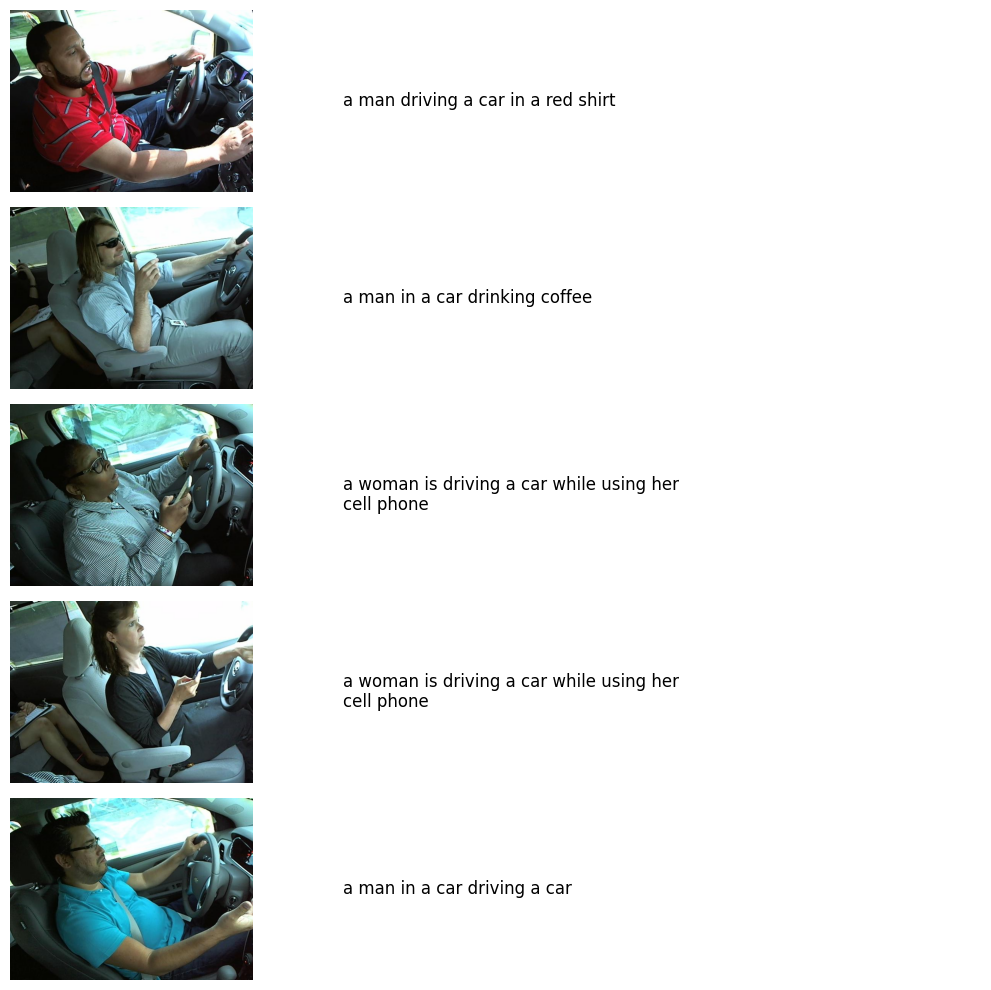

In [ ]:
import textwrap
import os
import torch
from transformers import Blip2Processor, Blip2ForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# Load BLIP-2 Processor & Model
processor = Blip2Processor.from_pretrained("Salesforce/blip2-flan-t5-xl")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-flan-t5-xl").to(device)

# generate captions
def generate_caption(image_path):
    image = Image.open(image_path).convert("RGB")
    
    # Process image
    inputs = processor(images=image, return_tensors="pt").to(device)
    
    # Generate caption
    output = model.generate(**inputs)
    caption = processor.batch_decode(output, skip_special_tokens=True)[0]
    
    return caption

# test set
test_dir = "data/imgs/test"
test_images = os.listdir(test_dir)[:5] 

fig, axes = plt.subplots(len(test_images), 2, figsize=(12, 10)) 

for idx, img_name in enumerate(test_images):
    img_path = os.path.join(test_dir, img_name)
    caption = generate_caption(img_path)  
    
    # Wrap caption
    wrapped_caption = textwrap.fill(caption, width=40)  

    # Load and display image
    image = Image.open(img_path).convert("RGB")
    axes[idx, 0].imshow(image) 
    axes[idx, 0].axis("off") 
    
    # Display wrapped caption in the right column
    axes[idx, 1].text(0, 0.5, wrapped_caption, fontsize=12, va="center")  
    axes[idx, 1].axis("off")  

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()